#  Загрузка предобученных эмбеддингов

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://rusvectores.org/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* https://github.com/natasha/navec
* https://pytorch.org/docs/stable/generated/torch.nn.Embedding.html

## Задачи для совместного разбора

1\. Создайте объект `nn.Embedding` на основе файла `ruscorpora_upos_skipgram_300_5_2018_sample.vec`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch as th
import torch.nn as nn

In [ ]:
embeddings = []
words = []
with open("/content/drive/MyDrive/NLP/5/ruscorpora_upos_skipgram_300_5_2018_sample_example.vec", "r") as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(" ", maxsplit=1)
    word, pos = word_pos.split("_")
    emb = [float(n) for n in v.split(" ")]
    embeddings.append(emb)
    words.append(word)
embeddings = th.tensor(embeddings)

In [ ]:
embeddings.shape

torch.Size([4, 300])

In [ ]:
words

['мочь', 'год', 'xx', 'человек']

In [ ]:
text = "человек мочь год"
text_tokens = text.split() # препроцессинг
text_tokens_idx = [words.index(t) for t in text_tokens]
text_tokens_idx

[3, 0, 1]

In [ ]:
embeddings[text_tokens_idx].shape

torch.Size([3, 300])

In [ ]:
sent_embedding = embeddings[text_tokens_idx].mean(dim=0)
sent_embedding.shape

torch.Size([300])

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=4, embedding_dim=300)
idx = th.tensor([0, 1]).long()
embedding_layer(idx).shape

torch.Size([2, 300])

In [ ]:
emb_pretrained = nn.Embedding.from_pretrained(embeddings)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Воспользовавшись предобученными эмбеддингами [ruscorpora_upos_skipgram_300_5_2018](https://rusvectores.org/static/models/rusvectores4/RNC/ruscorpora_upos_skipgram_300_5_2018.vec.gz), создайте словарь, где ключом является кортеж из слова и части речи, а значением - номер этого слова в файле эмбеддингами (первую строку при расчете номера строк не учитывайте). Выведите на экран количество элементов в словаре. Создайте двумерный массив эмбеддингов и выведите на экран его форму.

- [ ] Проверено на семинаре

In [ ]:

import gzip
embeddings = []
words = dict()
with gzip.open("/content/drive/MyDrive/NLP/5/ruscorpora_upos_skipgram_300_5_2018.vec", "rt", encoding='UTF-8') as fp:
  fp.readline()
  for idx, line in enumerate(fp):
    word_pos, v = line.split(" ", maxsplit=1)
    word, pos = word_pos.split("_")
    emb = [float(n) for n in v.split(" ")]
    embeddings.append(emb)
    words[(word, pos)] = idx
embeddings = th.tensor(embeddings)

In [ ]:
embeddings.shape

torch.Size([195071, 300])

In [ ]:
words

{('мочь', 'VERB'): 0,
 ('год', 'NOUN'): 1,
 ('xx', 'NUM'): 2,
 ('человек', 'NOUN'): 3,
 ('сказать', 'VERB'): 4,
 ('говорить', 'VERB'): 5,
 ('время', 'NOUN'): 6,
 ('xxxx', 'NUM'): 7,
 ('знать', 'VERB'): 8,
 ('самый', 'ADJ'): 9,
 ('дело', 'NOUN'): 10,
 ('делать', 'VERB'): 11,
 ('день', 'NOUN'): 12,
 ('жизнь', 'NOUN'): 13,
 ('видеть', 'VERB'): 14,
 ('рука', 'NOUN'): 15,
 ('очень', 'ADV'): 16,
 ('первый', 'ADJ'): 17,
 ('новый', 'ADJ'): 18,
 ('давать', 'VERB'): 19,
 ('становиться', 'VERB'): 20,
 ('слово', 'NOUN'): 21,
 ('должен', 'ADJ'): 22,
 ('иметь', 'VERB'): 23,
 ('идти', 'VERB'): 24,
 ('xxx', 'NUM'): 25,
 ('большой', 'ADJ'): 26,
 ('глаз', 'NOUN'): 27,
 ('лицо', 'NOUN'): 28,
 ('хотеть', 'VERB'): 29,
 ('место', 'NOUN'): 30,
 ('понимать', 'VERB'): 31,
 ('смотреть', 'VERB'): 32,
 ('каждый', 'ADJ'): 33,
 ('работа', 'NOUN'): 34,
 ('казаться', 'VERB'): 35,
 ('писать', 'VERB'): 36,
 ('голова', 'NOUN'): 37,
 ('оставаться', 'VERB'): 38,
 ('сторона', 'NOUN'): 39,
 ('друг', 'NOUN'): 40,
 ('спрашива

<p class="task" id="2"></p>

2\. Используя PCA, уменьшите размерность загруженных эмбеддингов до 2. Визуализируйте на плоскости точки для слов "кот", "кошка", "собака", "киса", "овчарка", "студент", "препод". Добавьте для точек подписи.

- [ ] Проверено на семинаре

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(embeddings)

In [ ]:
needed = ["кот", "кошка", "собака", "киса", "овчарка", "студент", "препод"]

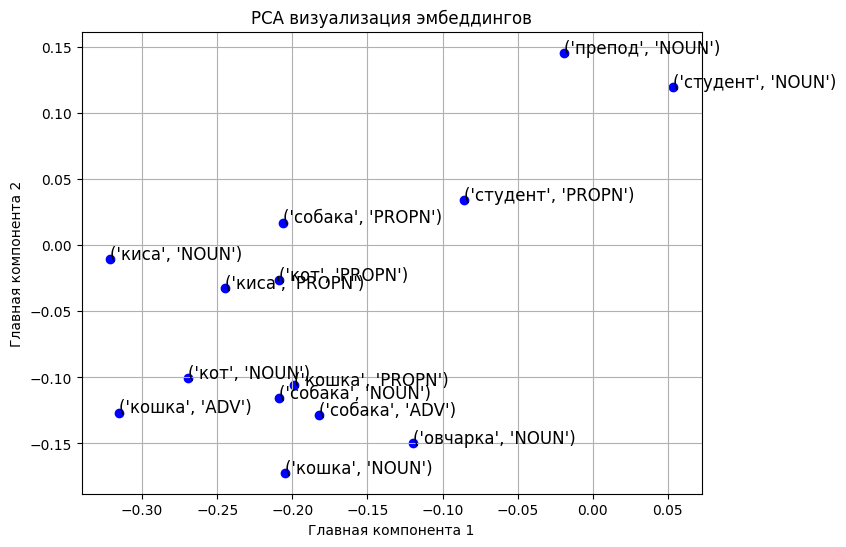

In [ ]:


plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    if word[0] in needed:
        x, y = reduced_vectors[i]
        plt.scatter(x, y, marker='o', color='blue')
        plt.text(x, y, word, fontsize=12)

plt.title("PCA визуализация эмбеддингов")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.grid()
plt.show()

<p class="task" id="3"></p>

3\. Напишите функцию, которая для заданного слова `word` находит `k` ближайших других слов в смысле евклидова расстояния между эмбеддингами. Продемонстрируйте работу функции на словах из предыдущего задания, выведя по 5 ближайших слов для каждого из них.

- [ ] Проверено на семинаре

In [ ]:
from scipy.spatial.distance import euclidean

In [346]:
def distance(word, k=5):
    dist = []
    for i, o_word in enumerate(words):
        # print(word[1])
        x = euclidean(word[1].numpy(), embeddings[i].numpy())
        dist.append([o_word, x])
    dist.sort(key=lambda x: x[1])
    if dist[0][1] == 0:
        dist.pop(0)
    return dist[:5]

In [347]:
import numpy as np
for i, word in enumerate(words):
    # print(word)
    # break
    if word[0] in needed:
        # print(word, embeddings[i].shape)
        print(word, distance([word, embeddings[i]]))

('собака', 'NOUN') [[('пес', 'NOUN'), 0.6251035332679749], [('кошка', 'NOUN'), 0.7636677622795105], [('овчарка', 'NOUN'), 0.7722702622413635], [('собачка', 'NOUN'), 0.7769297361373901], [('собачонка', 'NOUN'), 0.7851414680480957]]
('студент', 'NOUN') [[('аспирант', 'NOUN'), 0.7614341378211975], [('преподаватель', 'NOUN'), 0.7967895269393921], [('студентка', 'NOUN'), 0.8022908568382263], [('заочник', 'NOUN'), 0.8153549432754517], [('университет', 'NOUN'), 0.8203399181365967]]
('кошка', 'NOUN') [[('кот', 'NOUN'), 0.6624619960784912], [('собака', 'NOUN'), 0.7636677622795105], [('котенок', 'NOUN'), 0.7957860231399536], [('мяукать', 'VERB'), 0.8229527473449707], [('мяукать', 'NOUN'), 0.8391452431678772]]
('кот', 'NOUN') [[('кошка', 'NOUN'), 0.6624619960784912], [('котенок', 'NOUN'), 0.7936457395553589], [('рыбалкин', 'PROPN'), 0.8027359247207642], [('кота', 'NOUN'), 0.8124516606330872], [('клеточка', 'PROPN'), 0.8214152455329895]]
('овчарка', 'NOUN') [[('пес', 'NOUN'), 0.7692797780036926], 

<p class="task" id="4"></p>

4\. Создайте слой `nn.Embedding` на основе загруженных эмбеддингов. Для каждого слова из задания 2 найдите соответствующий ему индекс. Используя найденные индексы, получите для каждого слова его векторное представление. Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
import torch
from torch import nn

In [ ]:
num_embeddings, embedding_dim = embeddings.shape
num_embeddings, embedding_dim

(195071, 300)

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)

In [ ]:
embedding_layer(torch.tensor(list(words.values())).long()).shape

torch.Size([195071, 300])

In [ ]:
needed_idx = []
for i, word in enumerate(words):
    if word[0] in needed:
        needed_idx.append(words[word])

In [ ]:
needed_idx

[606,
 821,
 2320,
 3417,
 15103,
 19563,
 32164,
 37988,
 45288,
 45482,
 68112,
 81537,
 82267,
 168672]

In [ ]:
for idx in needed_idx:
    print(embedding_layer(torch.tensor(list(words.values())).long())[idx])

tensor([-4.5432e-01, -8.1333e-01, -6.1640e-01, -9.0312e-01,  1.1915e-01,
        -4.9499e-01, -3.7417e-01, -1.0192e+00, -1.0914e+00,  1.0625e+00,
        -8.3363e-02, -4.7336e-01,  5.6892e-01,  2.4943e-02,  8.9602e-01,
         9.0438e-01,  1.5427e+00,  1.1005e+00,  1.1516e+00,  1.4974e-02,
         2.6998e-01,  1.2679e+00,  2.9372e-01,  1.5586e+00, -3.9034e-01,
         1.1851e+00,  1.2390e+00,  1.2709e+00, -6.6877e-01, -6.9501e-02,
        -6.2683e-01,  1.2752e-01, -8.7995e-01,  2.1606e+00, -7.1392e-01,
        -1.2428e+00, -1.0714e+00, -4.2209e-02,  2.7432e-01,  6.9889e-01,
         1.0059e+00, -1.8307e+00,  3.4323e-01,  4.9458e-01,  4.0455e-01,
         1.0364e+00,  5.2169e-01,  9.2837e-01,  1.0808e+00,  8.9309e-01,
         5.9380e-01, -6.8228e-01,  8.8661e-01,  6.1263e-01,  4.3351e-01,
         3.8194e-01, -8.7692e-01, -1.3567e-01, -1.2309e-01, -2.3577e+00,
         2.7437e-01,  4.2473e-01,  6.2875e-01,  3.3203e-01,  2.8870e-01,
        -4.7174e-02, -8.2803e-01,  2.1649e-01,  1.2

In [ ]:
embedding_layer(torch.tensor(list(words.values())).long())[needed_idx].shape


torch.Size([14, 300])

In [ ]:
embedding_layer(torch.tensor(needed_idx)).shape

torch.Size([14, 300])

In [ ]:
(embedding_layer(torch.tensor(needed_idx)) == embedding_layer(torch.tensor(list(words.values())).long())[needed_idx]).sum()

tensor(4200)

<p class="task" id="5"></p>

5\. Создайте новый вариант `nn.Embedding`, расширив матрицу эмббедингов таким образом, чтобы для нулевого индекса возвращается тензор из нулей, а для первого индекса возвращается тензор из чисел $\frac{1}{300}$. Выведите на экран размер, количество эмбеддингов и эмбеддинги для индексов 0 и 1.

- [ ] Проверено на семинаре

In [ ]:
torch.tensor([0]*3)

tensor([0, 0, 0])

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=num_embeddings+2, embedding_dim=embedding_dim)

In [ ]:
embedding_layer.weight.data[0] = torch.zeros(embedding_dim)

In [ ]:
embedding_layer.weight.data[1] = torch.full((embedding_dim,), 1/300)

In [ ]:
embedding_layer.weight.requires_grad = False

In [ ]:
embedding_layer(torch.tensor(0))

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [ ]:
embedding_layer(torch.tensor(1))

tensor([0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033, 0.0033,
        0.0033, 0.0033, 0.0033, 0.0033, 

In [ ]:
needed_idx = [0, 1] + [x+2 for x in needed_idx]
needed_idx

[0,
 1,
 608,
 823,
 2322,
 3419,
 15105,
 19565,
 32166,
 37990,
 45290,
 45484,
 68114,
 81539,
 82269,
 168674]

In [ ]:
embedding_layer(torch.tensor(needed_idx))

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [-0.1121, -0.7241, -1.1584,  ...,  1.6328,  0.0912, -1.3493],
        ...,
        [-0.7271,  0.7798,  1.8757,  ..., -0.7583, -0.4426, -0.7685],
        [ 0.2757, -1.5963, -1.7199,  ..., -0.7835,  0.1581, -0.2809],
        [-0.2214,  0.0149, -0.9442,  ..., -1.3297, -0.9992, -0.9820]])

In [ ]:
embedding_layer(torch.tensor(needed_idx)).shape

torch.Size([16, 300])

In [ ]:
idx = list(words.values())
len(idx)

195071

In [ ]:
len(words.values())

195071

In [ ]:
idx = idx + [max(idx)+1, max(idx)+2]

In [ ]:
len(words), len(idx)

(195071, 195073)

In [ ]:
embedding_layer(torch.tensor(idx))

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0033,  0.0033,  0.0033,  ...,  0.0033,  0.0033,  0.0033],
        [ 2.6602, -1.2135,  0.3151,  ..., -0.4330,  0.2844,  1.3618],
        ...,
        [-0.0136,  1.6967, -1.4858,  ...,  0.7409, -0.7239, -0.8490],
        [-0.1672, -0.3750,  0.1275,  ...,  0.0268,  0.1022,  0.3032],
        [-0.1221,  0.8906, -0.4940,  ...,  0.9740,  0.9332, -0.3944]])

In [ ]:
embedding_layer(torch.tensor(idx)).shape

torch.Size([195073, 300])

<p class="task" id="6"></p>

6\. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. Части речи для простоты можно не учитывать. В случае отсутствия слова в словаре используйте индекс 1. Дополните все наборы индексов до одного размера индексом 0. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление. Выведите форму полученного тензора.

Получите векторное представление каждого предложения путем усреднения эмбеддингов слов этого предложения. Выведите форму результата на экран.

- [ ] Проверено на семинаре

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
word_tokenize("")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[]

In [ ]:
pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 41.4 MB/s eta 0:00:00


In [ ]:
import pymorphy3
import re

In [ ]:
morph  = pymorphy3.MorphAnalyzer()
# morph.parse(word)[0].normal_form

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
tokens = [[morph.parse(word)[0].normal_form for word in word_tokenize(i)] for i in sents]
tokens

[['робот',
  'пылесос',
  'только',
  'что',
  'опередить',
  'я',
  'и',
  'сожрать',
  'попкорнин',
  'который',
  'я',
  'хотеть',
  'поднять'],
 ['я', 'приходить', 'к', 'хирург', 'он', 'я', 'предложить', 'отрезать', 'ухо']]

In [ ]:
tokens_idx = []
for token in tokens:
    x = []
    for tok in token:
        flag = 0
        for k, v in words.items():
            if tok == k[0]:
                x.append(v+2)
                flag = 1
                break
        if not flag:
            x.append(1)
    tokens_idx.append(x)

In [ ]:
tokens_idx

[[8123, 18360, 1, 1, 20371, 77782, 1, 18829, 1, 1, 77782, 31, 5660],
 [77782, 49, 1, 5943, 1, 77782, 10399, 3655, 586]]

In [ ]:
from torch.nn.functional import pad

In [ ]:
tokens_idx[1] = pad(torch.tensor(tokens_idx[1]), (0, len(tokens_idx[0])-len(tokens_idx[1])))

In [ ]:
tokens_idx = torch.tensor(tokens_idx)

In [ ]:
tokens_idx

tensor([[ 8123, 18360,     1,     1, 20371, 77782,     1, 18829,     1,     1,
         77782,    31,  5660],
        [77782,    49,     1,  5943,     1, 77782, 10399,  3655,   586,     0,
             0,     0,     0]])

In [ ]:
vectors = []
for token in tokens_idx:
    vectors.append(embedding_layer(token))

In [ ]:
torch.stack(vectors).shape

torch.Size([2, 13, 300])

In [ ]:
sents = []
for sent in vectors:
    sents.append(sent.mean(dim=0))

In [ ]:
torch.stack(sents).shape

torch.Size([2, 300])

<p class="task" id="7"></p>

7\. Загрузите модель [navec_hudlit_v1_12B_500K_300d_100q.tar](https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar) с помощью пакета `navec`. Для каждого слова в каждом предложении батча получите его индекс. При поиске индекса слова приводите слово к нормальной форме. В случае отсутствия слова в словаре используйте индекс токена `<unk>`. Дополните все наборы индексов до одного размера индексом токена `<pad>`. Используя найденные индексы, получите для каждого слова в каждом предложении его векторное представление.  Выведите форму полученного тензора.

- [ ] Проверено на семинаре

In [ ]:
sents = [
    "робот пылесос только что опередил меня и сожрал попкорнину которую я хотел поднять",
    "я приходил к хирургу он мне предложил отрезать ухо"
]

In [ ]:
tokens = [[morph.parse(word)[0].normal_form for word in word_tokenize(i)] for i in sents]
tokens

[['робот',
  'пылесос',
  'только',
  'что',
  'опередить',
  'я',
  'и',
  'сожрать',
  'попкорнин',
  'который',
  'я',
  'хотеть',
  'поднять'],
 ['я', 'приходить', 'к', 'хирург', 'он', 'я', 'предложить', 'отрезать', 'ухо']]

In [ ]:
!wget https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar

--2025-03-14 11:40:10--  https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53012480 (51M) [application/x-tar]
Saving to: ‘navec_hudlit_v1_12B_500K_300d_100q.tar’

navec_hudlit_v1_12B 100%[===================>]  50.56M  11.8MB/s    in 4.3s    

2025-03-14 11:40:15 (11.8 MB/s) - ‘navec_hudlit_v1_12B_500K_300d_100q.tar’ saved [53012480/53012480]



In [ ]:
pip install navec

In [ ]:
from navec import Navec
navec = Navec.load('/content/navec_hudlit_v1_12B_500K_300d_100q.tar')

In [ ]:
pad_idx = navec.vocab.get('<pad>', 0)
unk_idx = navec.vocab.get('<unk>', 1)

In [ ]:
tokens_idx = []
for token in tokens:
    x = []
    for tok in token:
        x.append(navec.vocab.get(tok, unk_idx))
    tokens_idx.append(x)

In [ ]:
tokens_idx

[[378109,
  357295,
  436756,
  482066,
  267912,
  497765,
  146473,
  408788,
  500000,
  182773,
  497765,
  473233,
  309105],
 [497765, 342851, 160196, 470904, 267308, 497765, 330993, 280341, 459125]]

In [ ]:
lens = list(map(len, tokens_idx))
lens

[13, 9]

In [ ]:
tokens_idx[1] += [pad_idx] * (lens[0]-lens[1])

In [ ]:
tokens_idx = torch.tensor(tokens_idx)
tokens_idx

tensor([[378109, 357295, 436756, 482066, 267912, 497765, 146473, 408788, 500000,
         182773, 497765, 473233, 309105],
        [497765, 342851, 160196, 470904, 267308, 497765, 330993, 280341, 459125,
         500001, 500001, 500001, 500001]])

In [ ]:
navec['<unk>'].shape

(300,)

In [ ]:
print(navec.vocab.get('уауа'))

None


In [ ]:
tokens[1] += ['<pad>'] * 4
lens = list(map(len, tokens))
lens

[13, 13]

In [ ]:
tokens

[['робот',
  'пылесос',
  'только',
  'что',
  'опередить',
  'я',
  'и',
  'сожрать',
  'попкорнин',
  'который',
  'я',
  'хотеть',
  'поднять'],
 ['я',
  'приходить',
  'к',
  'хирург',
  'он',
  'я',
  'предложить',
  'отрезать',
  'ухо',
  '<pad>',
  '<pad>',
  '<pad>',
  '<pad>']]

In [ ]:
vectors = []

for sent in tokens:
    x = []
    for word in sent:
        if navec.vocab.get(word) is not None:
            x.append(navec[word])
        else:
            x.append(navec['<unk>'])
    vectors.append(torch.stack(list(map(torch.tensor, x))))

In [ ]:
torch.stack(vectors).shape

torch.Size([2, 13, 300])